In [114]:
# Import library
import pandas as pd
import numpy as np



In [115]:
# load dataset

movies = pd.read_csv('../data/movies.csv')

movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


### Explore the data

In [116]:
# information about data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [117]:
movies.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


In [118]:
# Check null values

movies.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [119]:
# in percent
print((movies.isna().sum()/movies.shape[0]))

MOVIES      0.000000
YEAR        0.064406
GENRE       0.008001
RATING      0.182018
ONE-LINE    0.000000
STARS       0.000000
VOTES       0.182018
RunTime     0.295830
Gross       0.953995
dtype: float64


In [120]:
# duplicate data

movies.duplicated().sum()

np.int64(431)

### Data Preprocessing

In [121]:
# Work on year column

movies['YEAR'] = movies['YEAR'].str.extract('(\d{4})')  # \d is the number from 0-9, we took 4 number to make year


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_11740/2707298692.py:3: SyntaxWarning: invalid escape sequence '\d'
  movies['YEAR'] = movies['YEAR'].str.extract('(\d{4})')  # \d is the number from 0-9, we took 4 number to make year


In [122]:
movies['YEAR']

0       2021
1       2021
2       2010
3       2013
4       2021
        ... 
9994    2021
9995    2021
9996    2022
9997    2021
9998    2021
Name: YEAR, Length: 9999, dtype: object

In [123]:
# remove /n from GENRE ,ONE-LINE 
def remove_n(col):
    movies[col] = movies[col].str.replace("\n", "").str.strip()
    return movies

movies = remove_n('GENRE')
movies = remove_n('ONE-LINE')


In [124]:
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [125]:
# def extract_director(row):
#     if 'Director' in row:
#         director = row.split("Director: ")[1].split('|')[0]

#     return director

# movies['Director'] = movies.apply(extract_director)
# movies.head()

In [126]:
 # Seperate director and star
def extract_info(row):
    director = None
    stars = None
    if 'Director:' in row:
        director = row.split('Director:\n')[1].split('\n|')[0].strip()
    if 'Stars:' in row:
        stars = row.split('Stars:\n')[1].replace('\n', '').strip()
    return director, stars

movies[['Director', 'Stars']] = movies['STARS'].apply(lambda x: pd.Series(extract_info(x)))

In [128]:
# now we no more need STARS column
movies.drop('STARS',axis=1, inplace=True)

movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Director,Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"21,062",121.0,NaN,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"17,870",25.0,NaN,None,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"885,805",44.0,NaN,None,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"414,849",23.0,NaN,None,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",NaN,NaN,NaN,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."


In [131]:
# Remove duplicates

movies.duplicated().sum()


np.int64(445)

In [133]:
movies.drop_duplicates(inplace=True)

print(f'Duplicate rows: {movies.duplicated().sum()}')

Duplicate rows: 0


In [140]:
# clean and fill missing valus in Vote column

movies['VOTES'] = movies['VOTES'].astype(str).str.replace(',', '').str.strip()
movies['VOTES'] = pd.to_numeric(movies['VOTES'], errors='coerce')


print(movies['VOTES'].dtype)

float64


In [143]:
# fill missing values
movies['VOTES'] = movies['VOTES'].fillna(0)

print(f'Missing values in votes: {movies['VOTES'].isna().sum()}')

Missing values in votes: 0


In [147]:
# Fill director column with Unkonwn

movies['Director'] = movies['Director'].fillna('Unknown').astype(str)


dtype('O')

In [149]:
movies['Director'].sample(20)

8330       Tae You Chang
4020       Kasper Collin
1444             Unknown
2498             Unknown
2508       Mikhil Musale
2429       Lee Thongkham
8127             Unknown
7063        Ben Bjelajac
853              Unknown
4355             Unknown
6178             Unknown
5101             Unknown
514              Unknown
2757             Unknown
7854     Soumendra Padhi
9584             Unknown
5774       Ismail Farouk
8757         Brian Smith
4917    John Lee Hancock
8584             Unknown
Name: Director, dtype: object

In [151]:
movies['Gross'].sample(10)

5542    $0.05M
1947       NaN
5041       NaN
5567       NaN
2571       NaN
4416       NaN
1681       NaN
9558       NaN
6552       NaN
693        NaN
Name: Gross, dtype: object

In [156]:
# clean gross column
movies['Gross'] = movies['Gross'].str.replace('$', '').str.strip()

def clean_gross(row):
    if isinstance(row, str):
        row = row.strip().upper()
        if "M" in row:
            return float(row.replace('M' , '')) * 1_000_000
        elif "K" in row:
            return float(row.replace('K' , ''))* 1000
        elif "B" in row:
            return float(row.replace('B' , '')) * 1_000_000_000
        
        else:
            try:
                return float(row.replace(',' ''))
            except:
                return None
            
    return None

movies['Gross'] = movies['Gross'].apply(clean_gross)


In [157]:
movies['Gross'].sample(10)

1237        NaN
3961        NaN
944         NaN
9258        NaN
8591        NaN
6898        NaN
6863        NaN
1612    30000.0
3963        NaN
4651        NaN
Name: Gross, dtype: float64

In [158]:

movies['Gross']=movies['Gross'].fillna(0)
movies['Gross']



0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9993    0.0
9995    0.0
9996    0.0
9997    0.0
9998    0.0
Name: Gross, Length: 9554, dtype: float64

In [159]:
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Director,Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,21062.0,121.0,0.0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,17870.0,25.0,0.0,Unknown,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,885805.0,44.0,0.0,Unknown,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,414849.0,23.0,0.0,Unknown,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",0.0,NaN,0.0,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."


In [161]:
movies['RATING'].dtype

dtype('float64')

In [162]:
# fill rating with median

movies['RATING'] = movies['RATING'].fillna(movies['RATING'].median())

In [163]:
movies['RATING'].sample(10)

6235    7.7
5629    7.5
942     6.5
9000    8.5
9833    8.7
3946    8.1
3051    7.3
1       5.0
7062    8.0
6095    6.0
Name: RATING, dtype: float64

In [164]:
# fill runtime
movies['RunTime'] = movies['RunTime'].fillna(movies['RunTime'].median())

In [166]:

# Remove outliers

def remove_n(movies, column):
    Q1 = movies[column].quantile(0.25)
    Q3 = movies[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    filtered_df = movies[(movies[column] >= lower_bound) & (movies[column] <= upper_bound)]
    return filtered_df

cols = ['VOTES', 'RunTime']

for column in cols:
    movies = remove_n(movies, column)



In [172]:
movies.sample(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Director,Stars
9278,Super Monsters,2017,"Animation, Adventure, Comedy",4.7,When Santa needs serious help prepping all of ...,35.0,24.0,0.0,Unknown,"Elyse Maloway, Asia Mattu, Gigi Saul Guerrero"
6994,La Reina de Indias y el Conquistador,2020,"Drama, History",7.1,"As Pedro's trial begins, his life depends on w...",0.0,60.0,0.0,Unknown,"Emmanuel Esparza, Essined Aponte, Vladimir Ber..."
4601,Alter Me,2020,"Drama, Romance",5.7,To better connect with other people - and her ...,53.0,91.0,0.0,RC Delos Reyes,"Enchong Dee, Jasmine Curtis-Smith, JC Santos, ..."
3928,The Forest,2016,"Drama, Fantasy, Horror",6.4,A new teacher arrives at a small village in ru...,276.0,109.0,0.0,Paul Spurrier,"Tanapol Kamkunkam, Thidarat Kongkaew, Natpatso..."
4990,An Act of War,2015,"Crime, Drama, Thriller",5.2,"A veteran tries to put his life back together,...",1422.0,99.0,110000.0,Ryan M. Kennedy,"Russ Russo, Natasha Alam, Doug E. Doug, Joseph..."
6314,TED: The Future We Will Create,2007,Documentary,6.9,"""TED: The future we will create"" gives you an ...",151.0,74.0,0.0,Unknown,"Daphne Zuniga, Al Gore, Lawrence Bender, Chris..."
6516,Avatar: The Last Airbender,2005,"Animation, Action, Adventure",9.3,A series of short stories covering some of the...,4347.0,25.0,0.0,Ethan Spaulding,"Zach Tyler, Mae Whitman, Jack De Sena, Michael..."
8853,Dark Desire,2020,"Drama, Mystery, Thriller",7.0,Lucinda insists she's owed money. Garcia revie...,80.0,60.0,0.0,Unknown,"Maite Perroni, Erik Hayser, Alejandro Speitzer..."
7351,The Movies That Made Us,2019,Documentary,8.0,"A rickety script, tight timeline and effects i...",463.0,47.0,0.0,Brian Volk-Weiss,"Donald Ian Black, Dan Aykroyd, Harold Ramis, I..."
7096,I Am Not Okay with This,2020,"Comedy, Drama, Fantasy",8.6,"Armed with new insight about her dad, Syd vows...",1800.0,24.0,0.0,Jonathan Entwistle,"Sophia Lillis, Wyatt Oleff, Sofia Bryant, Kath..."


## Data Visualization

In [176]:
import plotly.express as px

fig = px.box(
    movies, y = 'RunTime'
)

fig.update_layout(
    title = 'Boxplot of runtime',
    xaxis_title = "Runtime minutes",
    height = 600,
    width = 1000
)

# fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'RunTime=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAATkAAAAAAAIBbQAAAAAAAAE' ... 'AAAABOQAAAAAAAAE5AAAAAAAAATkA='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'height': 600,
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'title': {'text': 'Boxplot of runtime'},
               'width': 1000,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Runtime minutes'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'RunTime'}}}
})

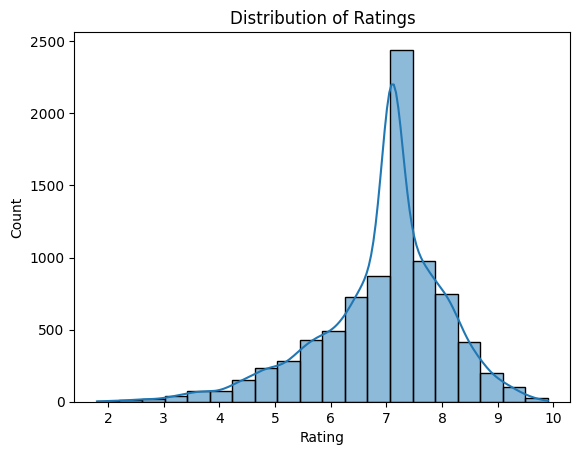

In [177]:
# distribution of movie ratings
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(movies['RATING'], kde = True, bins = 20)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [178]:
# most common genre

from collections import Counter

all_genre = movies['GENRE'].str.split(', ')
genres =[]

for sublist in all_genre:
    if isinstance(sublist, list):
        for genre in sublist:
            genres.append(genre)

genre_count = Counter(genres)

print(genre_count)

Counter({'Drama': 3401, 'Comedy': 2378, 'Action': 1753, 'Animation': 1438, 'Adventure': 1339, 'Crime': 1204, 'Documentary': 1139, 'Thriller': 736, 'Romance': 718, 'Mystery': 685, 'Fantasy': 428, 'Family': 398, 'Horror': 396, 'Reality-TV': 364, 'History': 295, 'Short': 239, 'Biography': 238, 'Sci-Fi': 215, 'Sport': 179, 'Music': 168, 'Game-Show': 97, 'Talk-Show': 89, 'Musical': 49, 'War': 33, 'News': 23, 'Western': 18, 'Film-Noir': 10})


/tmp/ipykernel_11740/3497672641.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




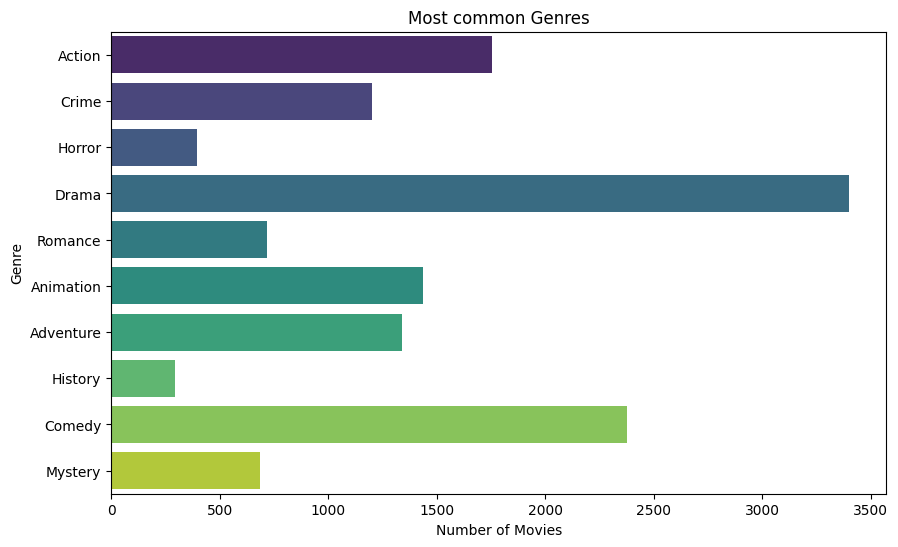

In [179]:
plt.figure(figsize=(10,6))
df_vis = pd.DataFrame(genre_count.items(), columns=['Genre', 'Count'])
sns.barplot(data=df_vis.head(10),y='Genre',x='Count',palette='viridis')
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Most common Genres")
plt.show()